In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate sample dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, 
                         n_redundant=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 1. Bagging Example
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)
bagging.fit(X_train, y_train)
bagging_pred = bagging.predict(X_test)

# 2. Random Forest Example
rf = RandomForestClassifier(
    n_estimators=100,
    max_features='sqrt',
    random_state=42
)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# 3. AdaBoost Example
ada = AdaBoostClassifier(
    n_estimators=100,
    random_state=42
)
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)

# Performance Comparison
print("Bagging Accuracy:", accuracy_score(y_test, bagging_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("AdaBoost Accuracy:", accuracy_score(y_test, ada_pred))

Bagging Accuracy: 0.88
Random Forest Accuracy: 0.87
AdaBoost Accuracy: 0.805


/Users/edgarhuaranga/Projects/ULima/2024-2/ML/.conda/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [6]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Crear clasificadores base
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf3 = SVC(probability=True)

# Crear ensemble por votación
ensemble = VotingClassifier(
    estimators=[('lr', clf1), ('dt', clf2), ('svc', clf3)],
    voting='soft'  # 'soft' para probabilidades, 'hard' para predicciones directas
)

# Entrenar
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('svc', SVC(probability=True))],
                 voting='soft')

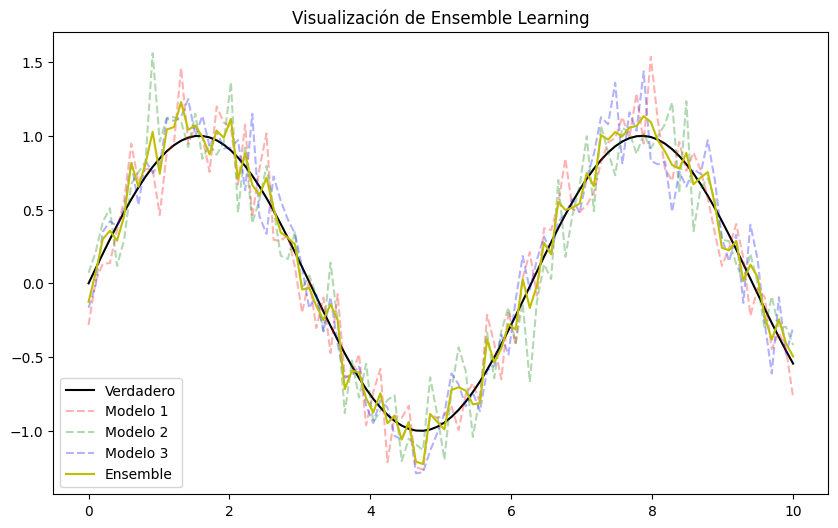

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Crear datos de ejemplo
np.random.seed(42)
x = np.linspace(0, 10, 100)
y_true = np.sin(x)
y_noise = y_true + np.random.normal(0, 0.1, 100)

# Simular diferentes modelos
model1 = y_true + np.random.normal(0, 0.2, 100)
model2 = y_true + np.random.normal(0, 0.2, 100)
model3 = y_true + np.random.normal(0, 0.2, 100)

# Promedio de modelos (ensemble)
ensemble = (model1 + model2 + model3) / 3

# Visualizar
plt.figure(figsize=(10, 6))
plt.plot(x, y_true, 'k-', label='Verdadero')
plt.plot(x, model1, 'r--', alpha=0.3, label='Modelo 1')
plt.plot(x, model2, 'g--', alpha=0.3, label='Modelo 2')
plt.plot(x, model3, 'b--', alpha=0.3, label='Modelo 3')
plt.plot(x, ensemble, 'y-', label='Ensemble')
plt.legend()
plt.title('Visualización de Ensemble Learning')
plt.show()

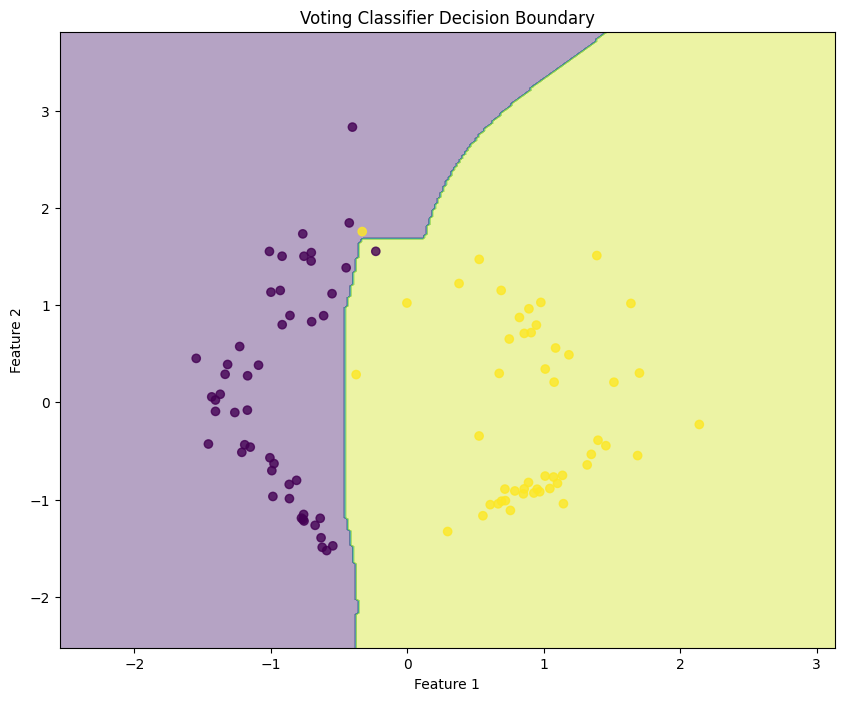

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def plot_voting_classifier(X, y, clf):
    # Standardize features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    # Create mesh grid
    h = 0.02  # Step size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Get predictions
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Voting Classifier Decision Boundary')
    plt.show()

# Example usage:
from sklearn.datasets import make_classification

# Generate sample dataset
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, 
                         n_informative=2, random_state=1, 
                         n_clusters_per_class=2)

# Create and fit the voting classifier
ensemble = VotingClassifier(
    estimators=[('lr', LogisticRegression()),
                ('dt', DecisionTreeClassifier()),
                ('svc', SVC(probability=True))],
    voting='soft'
)
ensemble.fit(X, y)

plot_voting_classifier(X, y, ensemble)

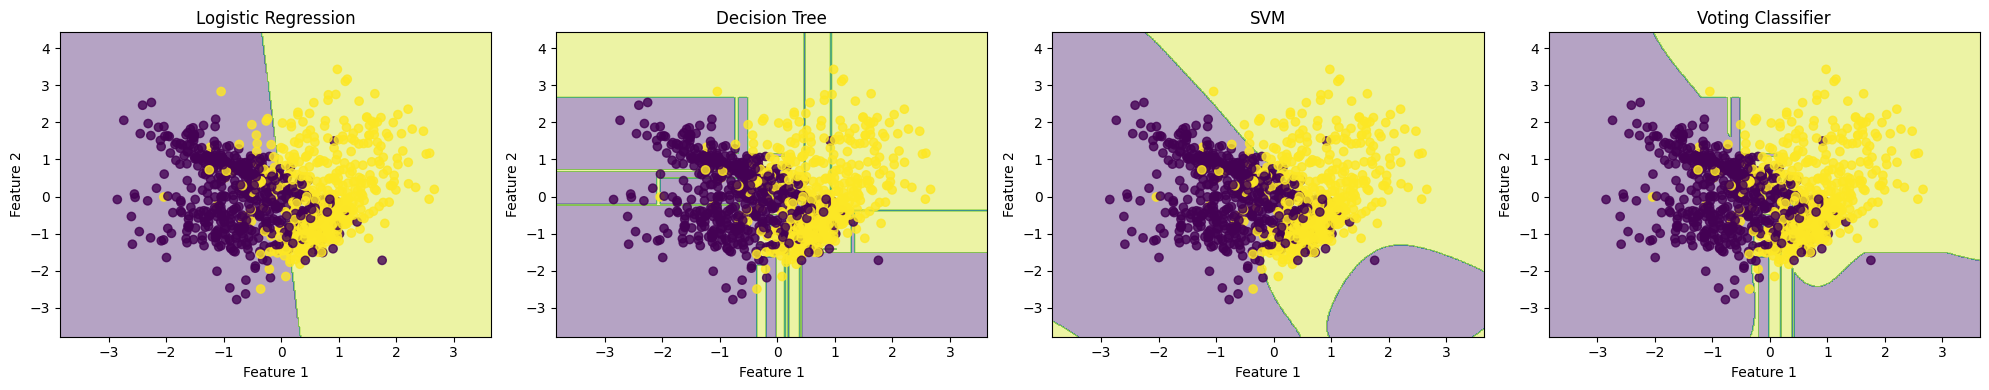

Logistic Regression Accuracy: 0.825
Decision Tree Accuracy: 0.740
SVM Accuracy: 0.845
Voting Classifier Accuracy: 0.810


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

def plot_decision_boundaries(X, y, classifiers, titles):
   # Standardize features
   scaler = StandardScaler()
   X = scaler.fit_transform(X)
   
   # Create mesh grid
   h = 0.02
   x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))

   # Plot each classifier
   fig, axes = plt.subplots(1, len(classifiers), figsize=(5*len(classifiers), 4))
   
   for idx, (clf, title) in enumerate(zip(classifiers, titles)):
       # Train classifier
       clf.fit(X, y)
       
       # Make predictions
       Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
       Z = Z.reshape(xx.shape)
       
       # Plot
       if len(classifiers) == 1:
           ax = axes
       else:
           ax = axes[idx]
           
       ax.contourf(xx, yy, Z, alpha=0.4)
       ax.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
       ax.set_xlabel('Feature 1')
       ax.set_ylabel('Feature 2')
       ax.set_title(title)
   
   plt.tight_layout()
   plt.show()

# Generate dataset
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
                        n_informative=2, random_state=1,
                        n_clusters_per_class=2)

# Create classifiers
basic_models = [
   LogisticRegression(),
   DecisionTreeClassifier(),
   SVC(probability=True)
]

ensemble = VotingClassifier(
   estimators=[('lr', LogisticRegression()),
               ('dt', DecisionTreeClassifier()),
               ('svc', SVC(probability=True))],
   voting='soft'
)

# Plot all models
classifiers = basic_models + [ensemble]
titles = ['Logistic Regression', 'Decision Tree', 'SVM', 'Voting Classifier']

plot_decision_boundaries(X, y, classifiers, titles)

# Compare accuracies
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

accuracies = []
for clf, title in zip(classifiers, titles):
   clf.fit(X_train, y_train)
   acc = clf.score(X_test, y_test)
   accuracies.append(acc)
   print(f'{title} Accuracy: {acc:.3f}')